# 2021-1C TP FIUFIP: Que No Se Escape Nadie

## Consideraciones iniciales

Inicialmente se clasificaron a las variables en influyentes o no, segun consideraciones a priori

#### Influye en altos o bajos ingresos

- años estudiados
- categoria de trabajo
- edad (Ya sea por experiencia o falta de estudio)
- estado marital
- horas_de_trabajo_registradas
- trabajo

#### No deberia influir

- Genero
- Barrio
- Religion

#### Primeras observaciones

Ademas de anotarse observaciones interesantes

- Barrio mas del 90% es de Palermo
- Anios estudiados es un mapa de educacion alcanzada
- ganancia_perdida_declarada_bolsa_argentina el 87% es cero
- El 85% le gusta Jesus
- Probablemente rol_familiar y estado_marital esten relacionadas


## Feature Engineering

In [1]:
import pandas as pd
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'

df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_GID), skiprows=0)

Buscamos las intancias con NaN's o con campos que se contradicen.


Primero buscamos las personas que indican no tener trabajo pero marca tener horas de trabajo registradas mayores de 0.

In [2]:
import numpy as np
def f(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n < acum


l = [f(x, 0) for x in df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].isna().to_numpy()]

df1= df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].reset_index()[l].set_index('index')
df1

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
index,,,,,,,,,,,,,
5361,10,Palermo,sin_trabajo,18,1_anio,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,0,NaN
10845,8,Palermo,sin_trabajo,23,7-8_grado,divorciado,0,hombre,35,cristianismo,sin_familia,0,NaN
14772,10,Palermo,sin_trabajo,17,1_anio,sin_matrimonio,0,hombre,30,cristianismo,con_hijos,0,NaN
20337,11,Palermo,sin_trabajo,18,2_anio,sin_matrimonio,0,mujer,10,cristianismo,con_hijos,0,NaN
23232,14,Palermo,sin_trabajo,20,5_anio,sin_matrimonio,0,hombre,40,judaismo,con_hijos,0,NaN
32304,13,Palermo,sin_trabajo,30,4_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,NaN
32314,14,Palermo,sin_trabajo,18,5_anio,sin_matrimonio,0,hombre,4,cristianismo,con_hijos,0,NaN


Estas 7 instancia tiene horas de trabajo registradas apesar de que indicaron que estan sin trabajo. Elejimos descartarlas por ser contradictorias y no estimar su tipo de trabajo mediante alguna indicador estadistico.

In [3]:
df.drop(df1.index, inplace = True)

Los siguiente son las instancias con mas datos no ingresados del dataframe y devido a que son muy poco decidimos eliminarlos antes que estimar sus datos invalidos.

In [4]:
import numpy as np
def f(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n < acum


l = [f(x, 2) for x in df.isna().to_numpy()]

df2= df.reset_index()[l].set_index('index')
df2

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
index,,,,,,,,,,,,,
61,8,NaN,NaN,32,7-8_grado,pareja_no_presente,0,hombre,40,cristianismo,sin_familia,0,NaN
297,18,NaN,NaN,39,universidad_4_anio,matrimonio_civil,3464,mujer,40,budismo,casada,0,NaN
1152,14,NaN,NaN,24,5_anio,sin_matrimonio,0,hombre,40,cristianismo,sin_familia,0,NaN
1676,13,NaN,NaN,64,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,NaN
2513,13,NaN,NaN,47,4_anio,matrimonio_civil,3942,hombre,40,cristianismo,casado,0,NaN
3131,14,NaN,NaN,25,5_anio,sin_matrimonio,0,hombre,40,judaismo,con_hijos,0,NaN
3579,17,NaN,NaN,21,universidad_3_anio,sin_matrimonio,0,hombre,25,budismo,sin_familia,0,NaN
3834,17,NaN,NaN,32,universidad_3_anio,sin_matrimonio,0,mujer,20,cristianismo,sin_familia,0,NaN
6059,10,NaN,NaN,35,1_anio,divorciado,0,mujer,16,cristianismo,soltero_a,0,NaN


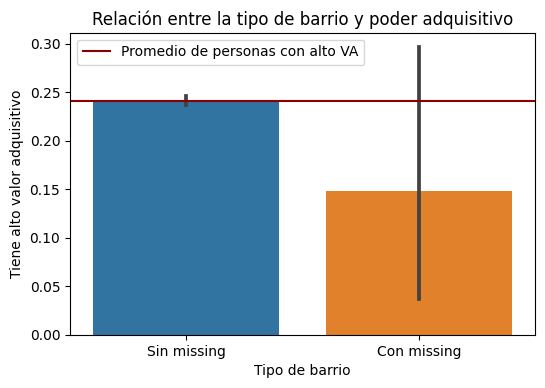

In [5]:
#Real devs dont use for
from functools import reduce
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
def f(x,y,z):
  return not x and not y and not z

  
df_tiene_barrio = df[['barrio', 'categoria_de_trabajo','tiene_alto_valor_adquisitivo','trabajo']].copy()
lista = df[['barrio', 'categoria_de_trabajo','trabajo']].notnull().values.tolist()
df_tiene_barrio['tiene_tres_missing'] = ['Con missing' if f(x[0],x[1],x[2]) else 'Sin missing' for x in lista]
df_tiene_barrio.value_counts('tiene_tres_missing')


plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_barrio,
    x='tiene_tres_missing',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de barrio")
plt.title('Relación entre la tipo de barrio y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()


Como podemos ver el grupo que presenta 3 missing (en las categorias de barrio, categoria de trabajo y trabajo) no presenta informacion significativa que nos permita determinar el alto valor adquisitivo devido a su gran varianza. Es por ello que decidimos eliminarlos...

In [6]:
df.drop(df2.index, inplace = True)
df

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,Palermo,relacion_de_dependencia,27,universidad_2_anio,matrimonio_civil,0,mujer,38,cristianismo,casada,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,4_anio,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento
32559,13,Palermo,relacion_de_dependencia,22,4_anio,sin_matrimonio,0,hombre,20,cristianismo,con_hijos,0,entretenimiento


In [7]:
import numpy as np
def f(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n < acum


l = [f(x, 0) for x in df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].isna().to_numpy()]

df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].reset_index()[l].set_index('index')

KeyError: "None of ['index'] are in the columns"

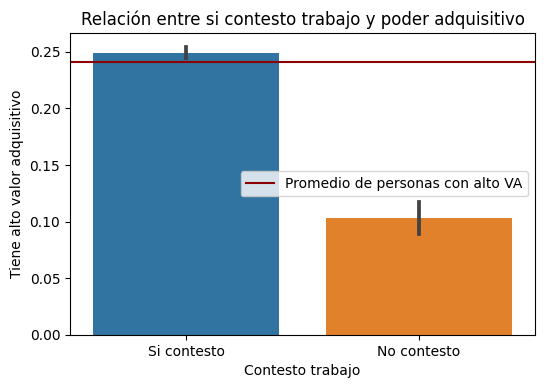

In [8]:
df_con_trabajo = df[['categoria_de_trabajo','tiene_alto_valor_adquisitivo','trabajo']].copy()
lista = df[['categoria_de_trabajo','trabajo']].notnull().values.tolist()
df_con_trabajo['contesto_trabajo'] = ['No contesto' if not x[0] and not x[1] else 'Si contesto' for x in lista]

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_con_trabajo,
    x='contesto_trabajo',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Contesto trabajo")
plt.title('Relación entre si contesto trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

Como podemos ver con el grafico todos las persona que no contestaron tiene una tendencia a poseer menor poder adquisitivo. De modo que genera un impacto en nuetros datos, lo mas conveniente es crear una nueva categoria (No contesto) y englobar todas estar persona en este nuevo campo.

In [9]:
df = df.replace({'trabajo': np.nan},'No contesto')

df['trabajo'].isna().any()

False

Tambien podemos notar que eduacion alzancada y anios estudidados nos aportan la misma informacion.(Luego ponder el mapeo)

In [10]:
df = df.drop(['educacion_alcanzada'],axis=1)

# Analisis de las consideraciones iniciales

#### años_estudiados

In [11]:
import numpy as np
def f(x, n):
    acum = 0
    for i in range(len(x)):
        if x[i]:
            acum += 1
    return n < acum


l = [f(x, 0) for x in df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].isna().to_numpy()]

df[df['trabajo'].isna() != df['categoria_de_trabajo'].isna()].reset_index()[l].set_index('index')


,anios_estudiados,barrio,categoria_de_trabajo,edad,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
index,,,,,,,,,,,,
27,14,Boedo,NaN,54,matrimonio_civil,0,hombre,60,budismo,casado,1,No contesto
69,14,Palermo,NaN,25,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,0,No contesto
77,10,Palermo,NaN,67,matrimonio_civil,0,hombre,2,cristianismo,casado,0,No contesto
106,10,Palermo,NaN,17,sin_matrimonio,34095,mujer,32,cristianismo,con_hijos,0,No contesto
128,13,Palermo,NaN,35,matrimonio_civil,0,hombre,40,cristianismo,casado,0,No contesto
...,...,...,...,...,...,...,...,...,...,...,...,...
32530,17,Palermo,NaN,35,matrimonio_civil,0,mujer,55,cristianismo,casada,1,No contesto
32531,17,Palermo,NaN,30,sin_matrimonio,0,mujer,99,budismo,sin_familia,0,No contesto
32539,20,Palermo,NaN,71,matrimonio_civil,0,hombre,10,cristianismo,casado,1,No contesto


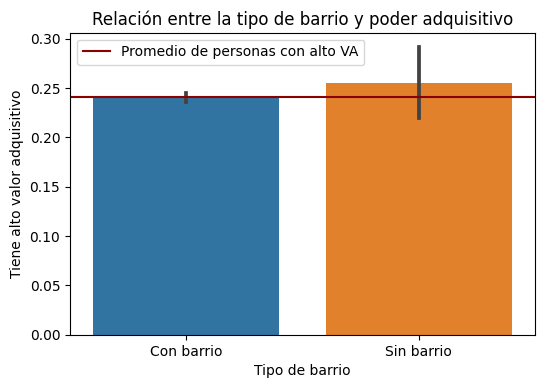

In [12]:
#Real devs dont use for
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

df_tiene_barrio = df[['barrio', 'tiene_alto_valor_adquisitivo']].copy()
df_tiene_barrio['barrio'] = df['barrio'].notnull().apply(lambda x: 'Con barrio' if x else 'Sin barrio')

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_barrio,
    x='barrio',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de barrio")
plt.title('Relación entre la tipo de barrio y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

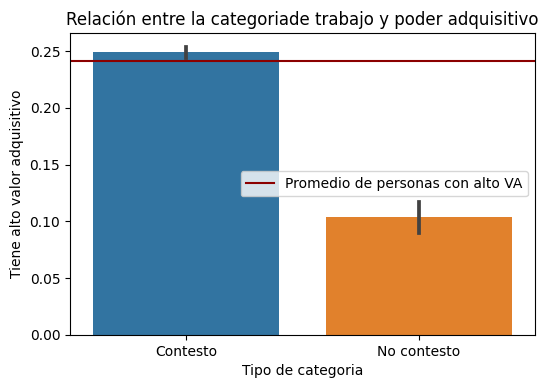

In [13]:
df_tiene_categoria_de_trabajo = df[['categoria_de_trabajo', 'tiene_alto_valor_adquisitivo']].copy()
df_tiene_categoria_de_trabajo['categoria_de_trabajo'] = df['categoria_de_trabajo'].notnull().apply(lambda x: 'Contesto' if x else 'No contesto')

plt.figure(dpi=100)

ax = sns.barplot(
    data=df_tiene_categoria_de_trabajo,
    x='categoria_de_trabajo',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("Tiene alto valor adquisitivo")
plt.xlabel("Tipo de categoria")
plt.title('Relación entre la categoriade trabajo y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend()
plt.show()

In [14]:
df_tiene_categoria_de_trabajo['categoria_de_trabajo'].value_counts(normalize=True)

Contesto       0.944385
No contesto    0.055615
Name: categoria_de_trabajo, dtype: float64

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as snsdf_tiene_categoria_de_trabajo['categoria_de_trabajo'].value_counts()



# Caracteristicas vs Tiene alto poder adquisitivo



In [ ]:
df

# Edad


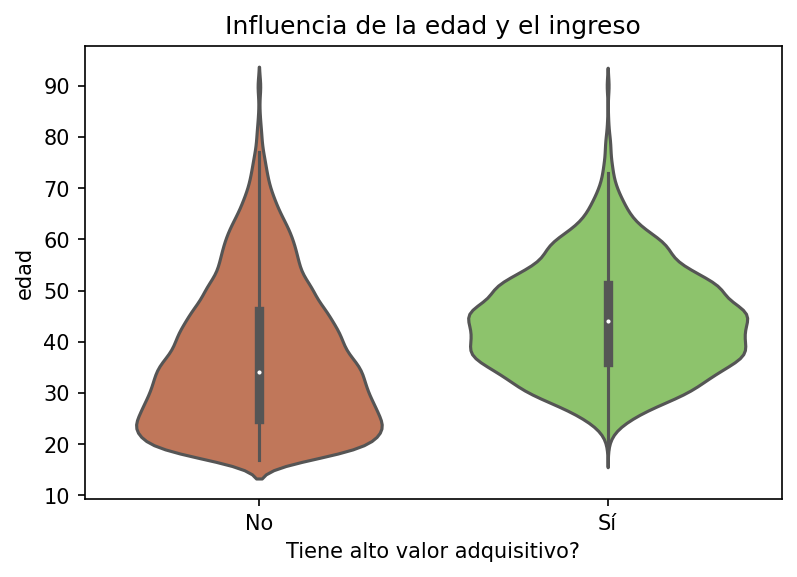

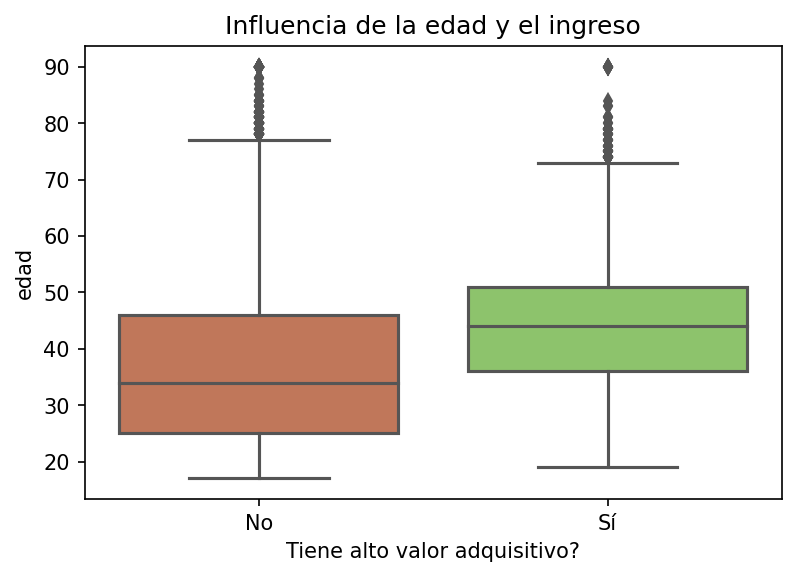

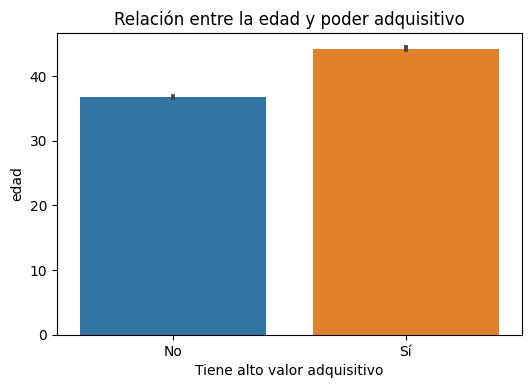

In [15]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de la edad y el ingreso")
sns.violinplot(
    data=df,
    y='edad',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de la edad y el ingreso")
sns.boxplot(
    data=df,
    y='edad',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='edad')

plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre la edad y poder adquisitivo')
plt.show()

Existe gente con 80 anios trabajando? Pro-ble-mas

Notas:

+ ViolinPlot podemos ver la tendencia de la edad.(+)

+ Boxplot nos motro que hay gente con 90 que trabaja R.A.R.O.(-)

+ Barplot queda bien marcado la diferencia en la edad, 10 anios aprox.(+)

# anios_estudiados



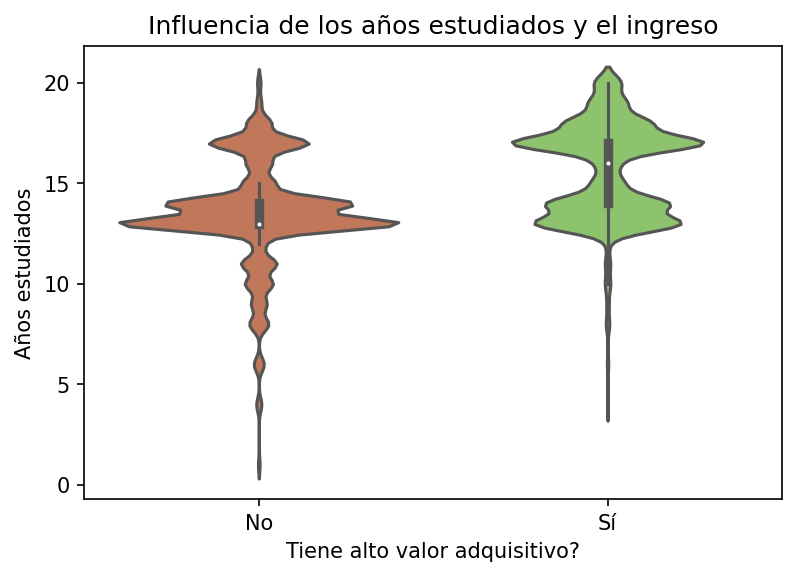

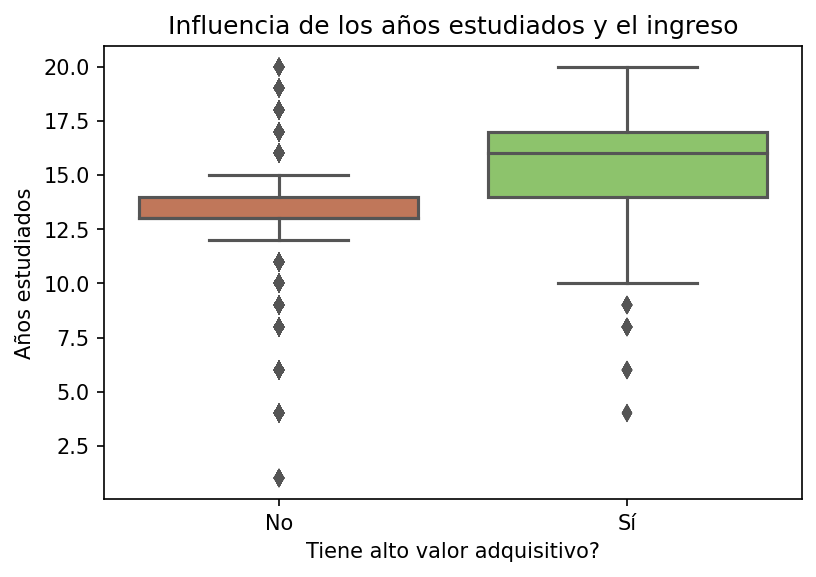

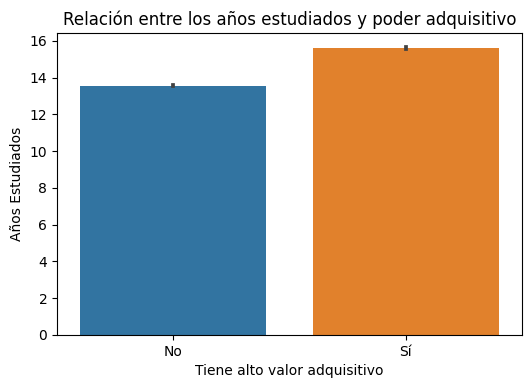

In [16]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.violinplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de los años estudiados y el ingreso")
sns.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("Años estudiados")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='anios_estudiados')

plt.ylabel("Años Estudiados")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre los años estudiados y poder adquisitivo')
plt.show()

Notas:
    
+ ViolinPlot muesta cierta tendencia en dos valores, 13 (terminar la secundaria) y 16/17 (terminanado una carrea). La distribucion es marcada cuando no tiene poder adquisitivo. Pero para los que si, parece estar distribuidos  mas uniformemente.(+)

+ Boxplot nos muetra la marcada diferencia entre las medianas de ambos grupos.(-)

+ Barplot remarca lo mismo que Boxplot(+)


# Horas De Trabajo


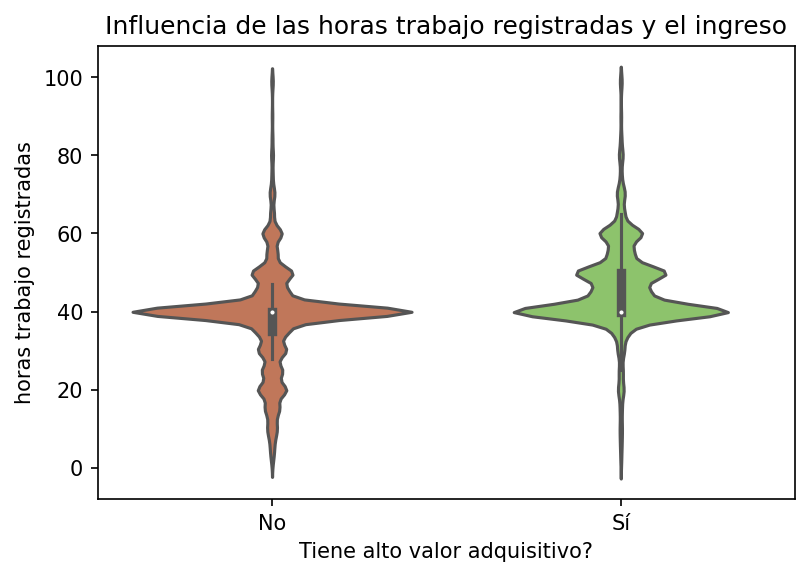

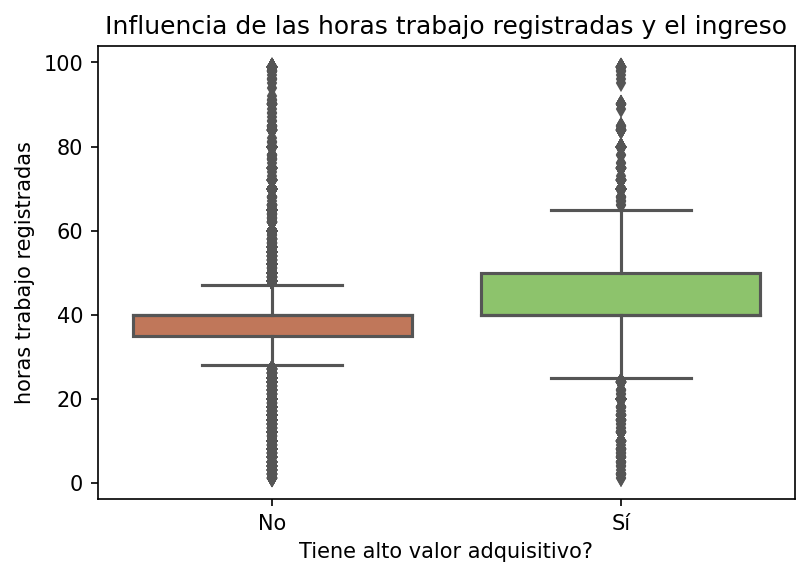

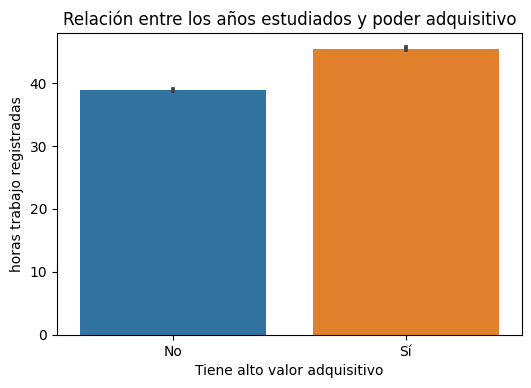

In [207]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de las horas trabajo registradas y el ingreso")
sns.violinplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de las horas trabajo registradas y el ingreso")
sns.boxplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='horas_trabajo_registradas')

plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre los años estudiados y poder adquisitivo')
plt.show()

Notas:

+ La cola del violinplot.(+)

+ Los overlide de el boxblot.(-)

+ Barblot muesta una tendencia natural +trabajo + plactica.(+)

# Estado Marital



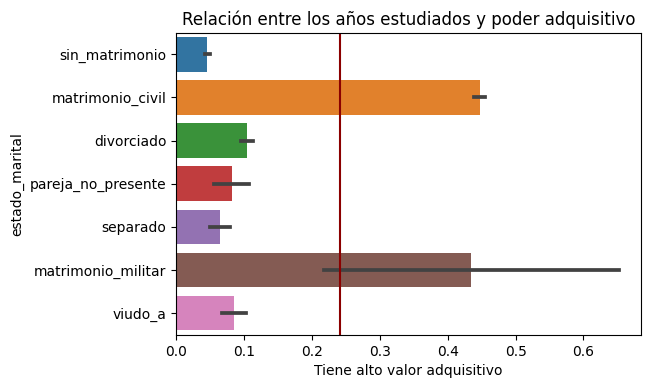

In [204]:
#BARPLOT
plt.figure(dpi=100)




ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='estado_marital')

plt.ylabel("estado_marital")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre los años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axvline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

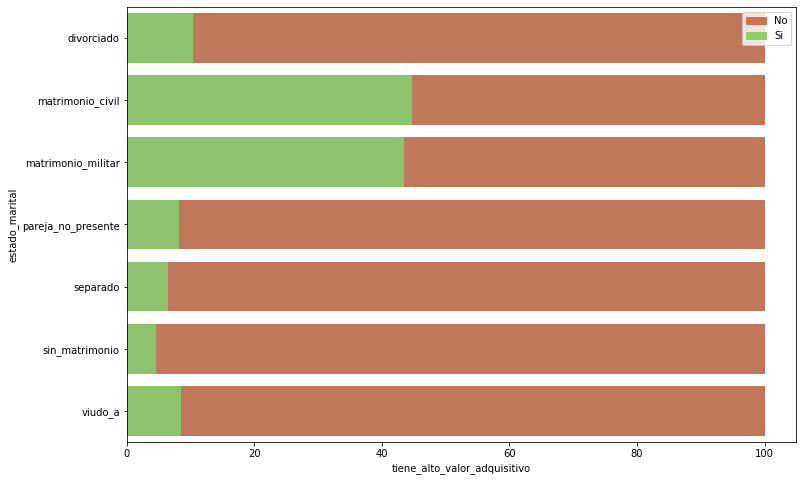

In [167]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 8))
total = df.groupby('estado_marital')['tiene_alto_valor_adquisitivo'].sum().reset_index()
alto_valor = df[df.tiene_alto_valor_adquisitivo == 1].groupby('estado_marital')['tiene_alto_valor_adquisitivo'].sum().reset_index()


a = df[df.tiene_alto_valor_adquisitivo == 1].groupby('estado_marital')['tiene_alto_valor_adquisitivo'].sum().reset_index()['tiene_alto_valor_adquisitivo'].tolist()
b = df.groupby('estado_marital')['anios_estudiados'].apply(lambda x: len(x)).tolist()

alto_valor['tiene_alto_valor_adquisitivo'] = [i / j * 100 for i,j in zip(a, b)]

total['tiene_alto_valor_adquisitivo'] = [i / j * 100 for i,j in zip(total['tiene_alto_valor_adquisitivo'], total['tiene_alto_valor_adquisitivo'])]

bar1 = sns.barplot(x="tiene_alto_valor_adquisitivo",  y="estado_marital", data=total, color='#D17049')


bar2 = sns.barplot(x="tiene_alto_valor_adquisitivo", y="estado_marital", data=alto_valor, color='#89D15E')

# add legend
top_bar = mpatches.Patch(color='#D17049', label='No')
bottom_bar = mpatches.Patch(color='#89D15E', label='Si')
#plt.legend(handles=[top_bar, bottom_bar])
plt.legend(handles=[top_bar, bottom_bar])
# show the graph
plt.show()

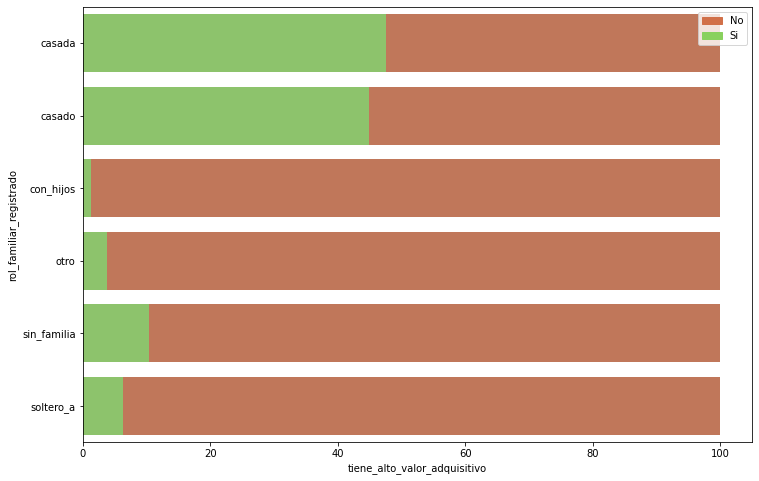

In [163]:
plt.figure(figsize=(12, 8))
total = df.groupby('rol_familiar_registrado')['tiene_alto_valor_adquisitivo'].sum().reset_index()
alto_valor = df[df.tiene_alto_valor_adquisitivo == 1].groupby('rol_familiar_registrado')['tiene_alto_valor_adquisitivo'].sum().reset_index()


a = df[df.tiene_alto_valor_adquisitivo == 1].groupby('rol_familiar_registrado')['tiene_alto_valor_adquisitivo'].sum().reset_index()['tiene_alto_valor_adquisitivo'].tolist()
b = df.groupby('rol_familiar_registrado')['anios_estudiados'].apply(lambda x: len(x)).tolist()

alto_valor['tiene_alto_valor_adquisitivo'] = [i / j * 100 for i,j in zip(a, b)]

total['tiene_alto_valor_adquisitivo'] = [i / j * 100 for i,j in zip(total['tiene_alto_valor_adquisitivo'], total['tiene_alto_valor_adquisitivo'])]

bar1 = sns.barplot(x="tiene_alto_valor_adquisitivo",  y="rol_familiar_registrado", data=total, color='#D17049')


bar2 = sns.barplot(x="tiene_alto_valor_adquisitivo", y="rol_familiar_registrado", data=alto_valor, color='#89D15E')

# add legend
top_bar = mpatches.Patch(color='#D17049', label='No')
bottom_bar = mpatches.Patch(color='#89D15E', label='Si')
#plt.legend(handles=[top_bar, bottom_bar])
plt.legend(handles=[top_bar, bottom_bar])
# show the graph
plt.show()

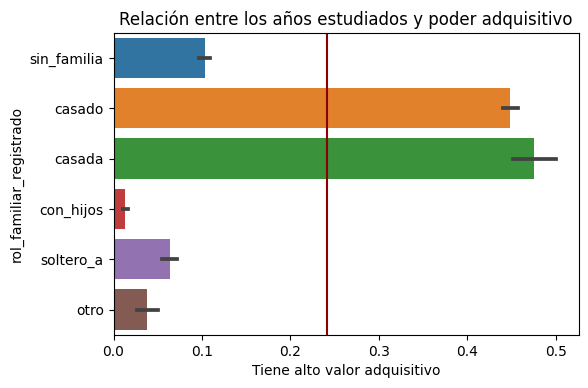

In [203]:
#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='rol_familiar_registrado')

plt.ylabel("rol_familiar_registrado")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre los años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axvline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

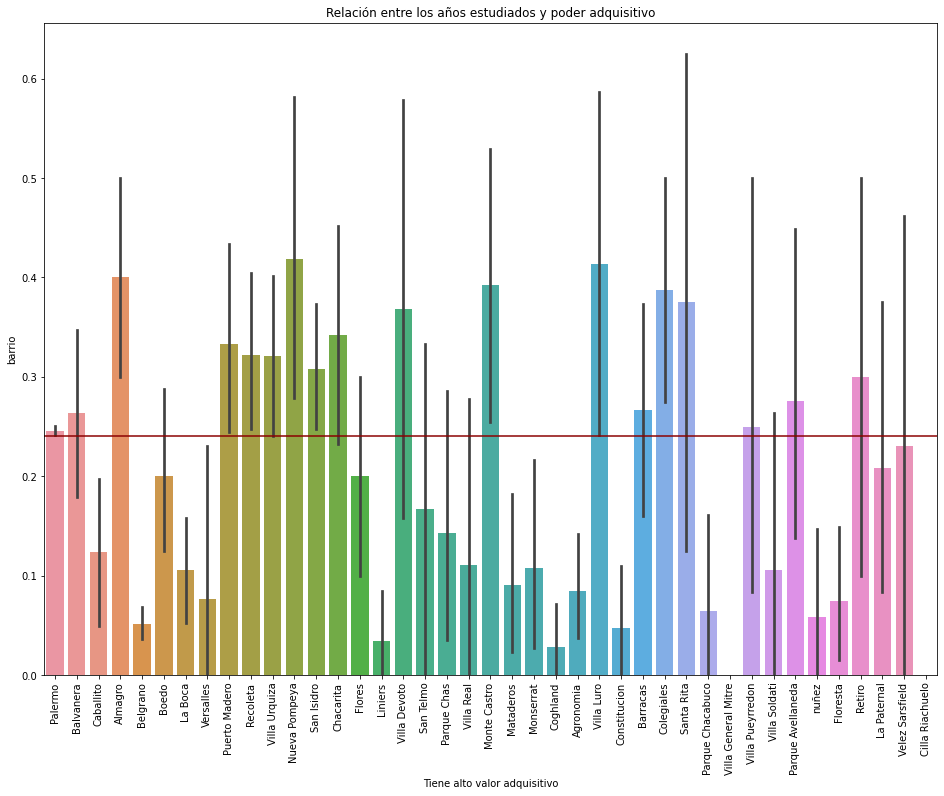

In [211]:
#BARPLOT
plt.figure(figsize=(16, 12))

ax = sns.barplot(
    data=df,
    x='barrio',
     y='tiene_alto_valor_adquisitivo')

plt.ylabel("barrio")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks(rotation=90)
plt.title('Relación entre los años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

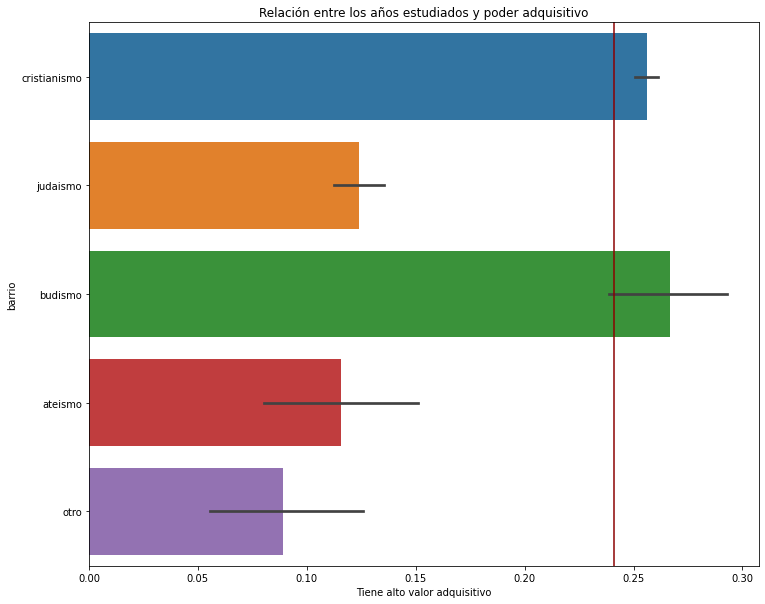

In [200]:
#BARPLOT
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='religion')

plt.ylabel("barrio")
plt.xlabel("Tiene alto valor adquisitivo")
plt.title('Relación entre los años estudiados y poder adquisitivo')
prom = df['tiene_alto_valor_adquisitivo'].mean()
plt.axvline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.show()

In [212]:
df['barrio'].value_counts(normalize = True)

Palermo                0.912170
Belgrano               0.020112
San Isidro             0.006193
Villa Urquiza          0.004285
Recoleta               0.003785
La Boca                0.003566
Agronomia              0.003316
Almagro                0.003128
Balvanera              0.002971
Puerto Madero          0.002815
Caballito              0.002534
Boedo                  0.002502
Barracas               0.002346
Chacarita              0.002283
Coghland               0.002189
Floresta               0.002096
Constitucion           0.002002
Colegiales             0.001939
Flores                 0.001877
Liniers                0.001845
Monte Castro           0.001595
Mataderos              0.001376
Nueva Pompeya          0.001345
Monserrat              0.001157
nuñez                  0.001063
Parque Chacabuco       0.000970
Villa Luro             0.000907
Parque Avellaneda      0.000907
Parque Chas            0.000876
La Paternal            0.000751
Retiro                 0.000626
Villa So